# Import packages

In [72]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
from fa2 import ForceAtlas2
from DataCleaningFunctions import DataCleaner, DataCollection, DataProcesser

# Data Collection 

In [2]:
params = {
        "thriller": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],[[]]]}, 
        "action": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]},             
        "comedy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007"]]},
        "adventure": {"years": ["2010s", "2000s"],
                "sub_years": [["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019", "2020", "2021", "2022"], ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]}, 
        "horror": {"years": ["2020", "2021", "2022", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019", "2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"], 
                "sub_years": [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]},
        "fantasy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        "science_fiction": {"years": ["2020s", "2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        }

data_collection = DataCollection()
data_movie_artist = pd.DataFrame()
for genre in params.keys():
    for years, sub_years in zip(params[genre]["years"],params[genre]["sub_years"]):
        data = data_collection.collect_movies_artist_data(genre, years, sub_years)
        data_movie_artist = pd.concat([data_movie_artist, data]) 

data_movie_artist = data_movie_artist.reset_index(drop=True)
#data_movie_artist.to_csv('data_movie_artist.csv', index=False)

In [3]:
#data_movie_artist = pd.read_csv('data_movie_artist.csv')
data_movie_artist.shape

(7414, 7)

# Data Cleaning

In [4]:
data_cleaner = DataCleaner(data_movie_artist)
data_cleaner.clean_columns()
data_movie_artist_cleaned = data_cleaner.data

In [5]:
data_movie_artist_cleaned.shape

(5725, 7)

In [6]:
data_movie_artist_cleaned.head(2)

,Title,Director,Cast,Country,Genre,Year,Hyperref
0,365 Days,barbara biaowas tomasz mandes,"anna-maria sieklucka,michele morrone, bronisaw...",europe,thriller,2020,365_Days_(2020_film)
1,7500,patrick vollrath,"joseph gordon-levitt,aylin tezel",other,action-thriller,2020,7500_(film)


# Data Processing

In [7]:
data_processing = DataProcesser()
data_movies_casts_splitted = data_processing.split_cast(data_movie_artist_cleaned)

In [10]:
data_movies_casts_splitted['Cast'].value_counts()

samuel l. jackson       31
dwayne johnson          31
nicolas cage            29
liam neeson             28
jason statham           27
                        ..
 james l. edwards        1
shianne daye             1
sadie katz               1
brian patrick butler     1
sean connery             1
Name: Cast, Length: 10798, dtype: int64

In [11]:
artist_collaboration_df = data_processing.get_artist_collaboration(data_movies_casts_splitted)

In [13]:
artist_collaboration_df.shape

(10798, 4)

In [14]:
artist_collaboration_df.head(2)

,Cast,Titles,connected,connected_count
0,a-f-r-o,[Bitch Ass],"[tony todd, sheaun mc kinney, tunde laleye]",3
1,a.j. lamas,[Seance mark l smith],"[kandis erickson, bridget shergalis]",2


In [51]:
artist_collaboration_df

,Cast,Titles,connected,connected_count
0,a-f-r-o,[Bitch Ass],"[ tunde laleye, sheaun mc kinney, tony todd]",3
1,a.j. lamas,[Seance mark l smith],"[ bridget shergalis, kandis erickson]",2
2,aaron carlson,[Thanks Killing],"[ lance predmore, ryan francis, lindsey ande...",7
3,aaron dalla villa,[Pledge],"[zachery bryd, zach weiner, philip andre bot...",3
4,aaron gaffey,[Joshua travis betz],"[ christy jackson, ward roberts]",2
...,...,...,...,...
10793,zoltan mucsi,[Kontroll],"[sandor csanyi, csaba pindroch]",2
10794,zooey deschanel,"[Our Idiot Brother, The New Guy, Eulogy, Surf ...","[john leguizamo, raoul trujillo, martin freema...",25
10795,zorion eguileor,[The Elderly],"[ irene anula, gustavo salmeron, paula gallego]",3
10796,zu qing,[Pleasant Goat and Big Big Wolf Amazing Pleasa...,"[ zhang lin, yyy]",2


# Basic Statistics

### Genre distribution

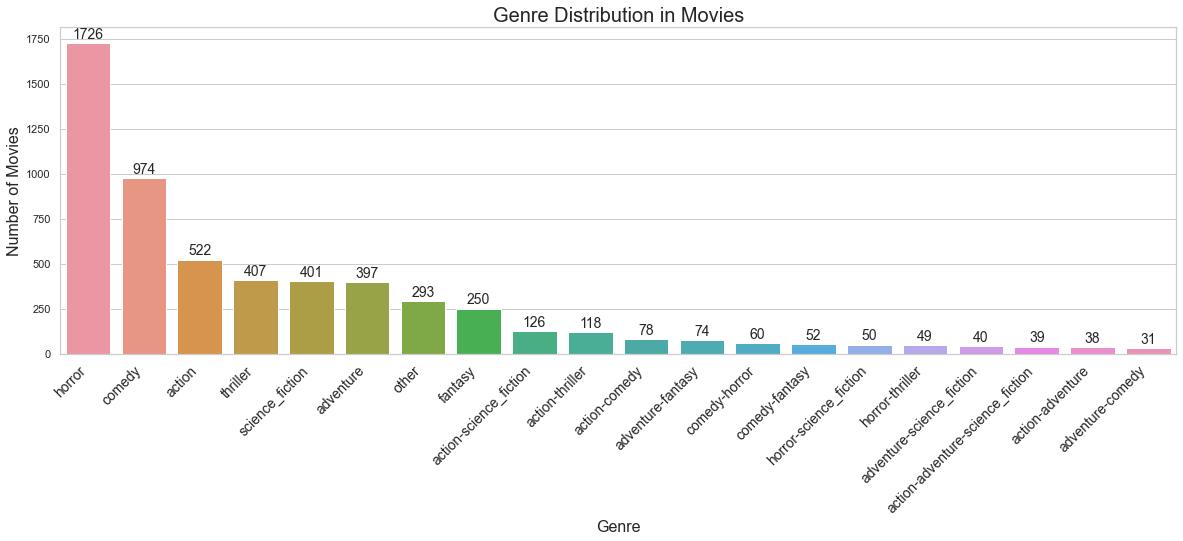

In [18]:
genre_counts = data_movie_artist_cleaned['Genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Genre', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Genre Distribution in Movies', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Movies over time 

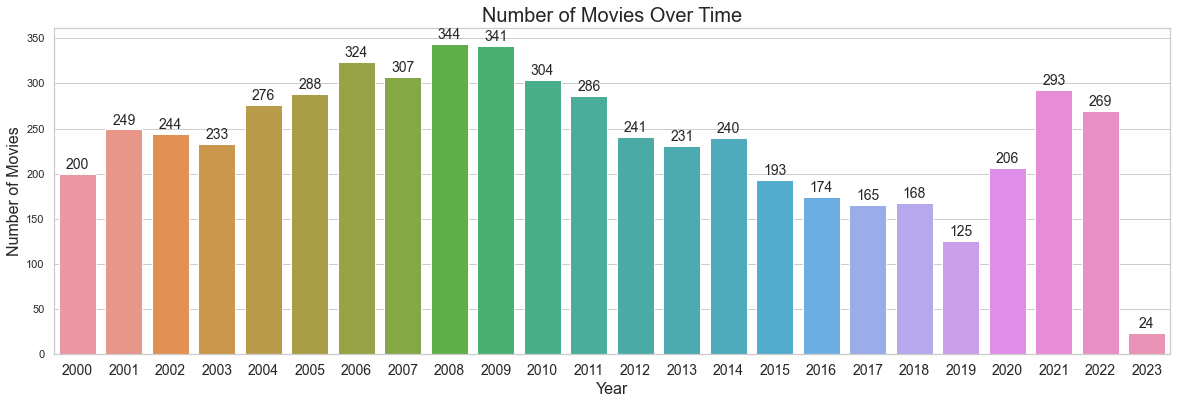

In [19]:
data_movie_artist_cleaned['Year'] = pd.to_numeric(data_movie_artist_cleaned['Year'], errors='coerce')
movies_per_year = data_movie_artist_cleaned.groupby('Year').size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Year', y='Number of Movies', data=movies_per_year)
plt.xticks(fontsize=14)
plt.title('Number of Movies Over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Country distribution

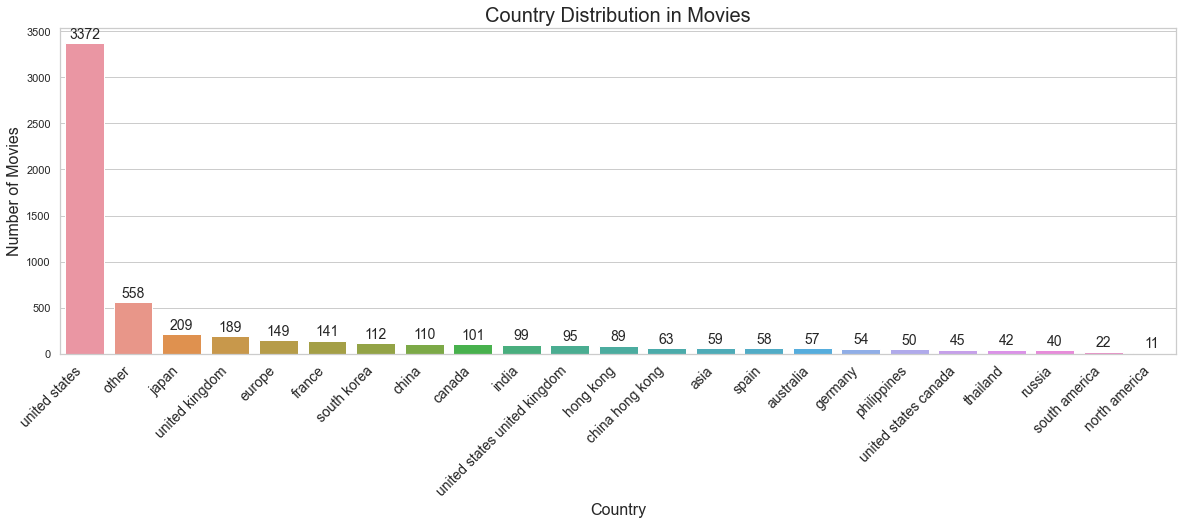

In [20]:
genre_counts = data_movie_artist_cleaned['Country'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Country', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Country', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Country Distribution in Movies', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

# Network Science

### Creating undirected graph with nodes as artists and edges between artists that have collaborated in movie together

In [21]:
# # Create Directed Graph
# G_artist = nx.DiGraph()

# # Adding nodes
# all_artist_nodes = list(list(artist_collaboration_df['Cast'].unique()))
# G_artist.add_nodes_from(all_artist_nodes)

# # Adding edges
# for artist, collaborators in zip(artist_collaboration_df['Cast'], artist_collaboration_df['connected']):
#     G_artist.add_edges_from([(artist, col) for col in collaborators])

In [43]:
# Initialize the graph
G_artist = nx.Graph()

# Add nodes
all_artist_nodes = list(list(artist_collaboration_df['Cast'].unique()))
G_artist.add_nodes_from(all_artist_nodes)

# Initialize a Counter to keep track of collaborations
collaboration_counter = Counter()

# Update the Counter with each collaboration
for artist, collaborators in zip(artist_collaboration_df['Cast'], artist_collaboration_df['connected']):
    for collaborator in collaborators:
        if artist != collaborator:
            collaboration_pair = tuple(sorted([artist, collaborator]))
            collaboration_counter[collaboration_pair] += 1

# Add weighted edges to the graph
for (artist1, artist2), weight in collaboration_counter.items():
    G_artist.add_edge(artist1, artist2, weight=weight)




In [44]:
print("The network consist of: ", G_artist.number_of_edges(), " links")
print("The network consist of: ", G_artist.number_of_nodes(), " nodes (artists)")

The network consist of:  29534  links
The network consist of:  10798  nodes (artists)


In [50]:
print("The average degree of the GCC is:", round(sum(dict(G_artist.degree()).values())/len(G_artist.degree)))

The average degree of the GCC is: 5


### Extracting the largest component

In [47]:
#Extracting the largest component
connected_components = nx.connected_components(G_artist)
# Finding the largest connected component
largest_cc = max(connected_components, key=len)
# Creating a subgraph for the largest connected component
G_largest_cc = G_artist.subgraph(largest_cc).copy()

In [48]:
print("The network consist of: ", G_largest_cc.number_of_edges(), " links")
print("The network consist of: ", G_largest_cc.number_of_nodes(), " nodes (artists)")

The network consist of:  22372  links
The network consist of:  6125  nodes (artists)


In [49]:
print("The average degree of the GCC is:", round(sum(dict(G_largest_cc.degree()).values())/len(G_largest_cc.degree)))

The average degree of the GCC is: 7


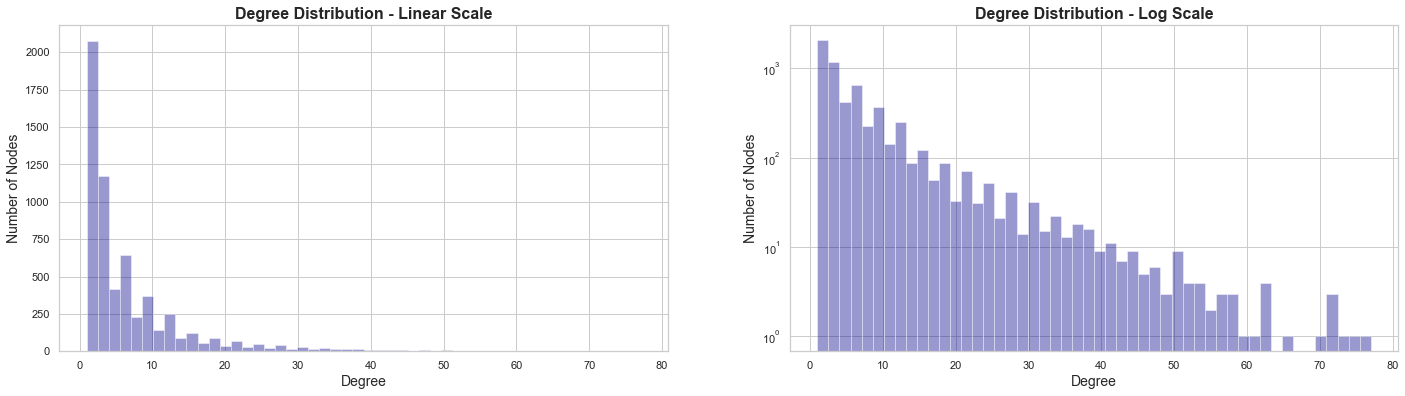

In [66]:
# Calculating degrees for each node
degrees = [G_largest_cc.degree(n) for n in G_largest_cc.nodes()]

# Convert the degrees list to a DataFrame
degrees_df = pd.DataFrame(degrees, columns=['Degree'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# First subplot for the regular scale histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Linear Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)

# Second subplot for the logarithmic scale histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Log Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.yscale('log')

# Show the plot
plt.show()


### Top connected artists

In [71]:
degrees = dict(G_largest_cc.degree())
degrees_artists = {node: degree for node, degree in degrees.items()}
top_connected = sorted(degrees_artists, key=degrees_artists.get, reverse=True)[:5]
print("Top 5 connected artists: ", top_connected)


Top 5 connected artists:  ['dwayne johnson', 'samuel l. jackson', 'liam neeson', 'ben kingsley', 'cate blanchett']


### Plot the network

In [73]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=500.0,  # Tolerance
                        barnesHutOptimize=False,
                        barnesHutTheta=2,
                        #multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=10,
                        strongGravityMode=False,
                        gravity=100,

                        # Log
                        verbose=True)

In [74]:
positions = forceatlas2.forceatlas2_networkx_layout(G_largest_cc, pos=None, iterations=100)

100%|██████████| 100/100 [00:10<00:00,  9.61it/s]

Repulsion forces  took  9.95  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.13  seconds


In [75]:
#Setting up node sizes (depends on degree)
d = dict(G_largest_cc.degree)
deg_size = [v * 3 for v in d.values()]

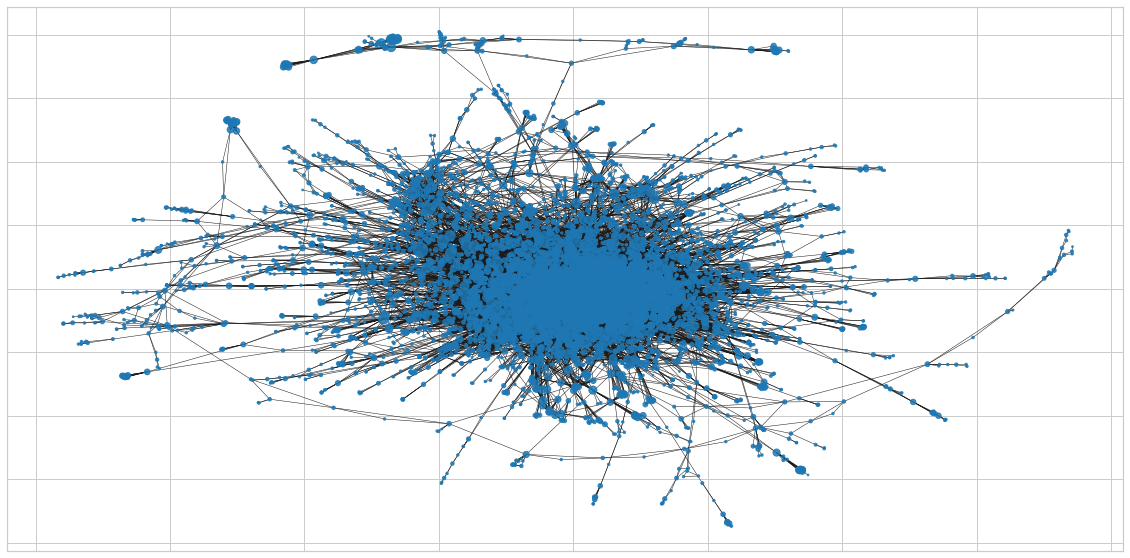

In [79]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G_largest_cc, positions, node_size=deg_size, alpha=0.85)
nx.draw_networkx_edges(G_largest_cc, positions, width = 0.5)#, edge_color=edge_colors,width=0.5)
plt.show()